In Regression we wish to predict continuous values, while in Classification we predict discrete labels.

In Linear Regression, we use a straight line to approximate values

$$\hat{y} = wx + b$$

Cost Function

$${MSE} = J(w,b) = \frac{1}{N}\sum_{i=1}^{n}(y_i - (wx_i+b))^2$$
To find the minimum MSE, calculate the gradient:
$$J'(w,b) = \begin{bmatrix}\frac{df}{dw} \\ \frac{df}{db}\end{bmatrix} = \begin{bmatrix}\frac{1}{N}\sum_{i=1}^{n}-2x_i(y_i - (wx_i+b)) \\ \frac{1}{N}\sum_{i=1}^{n}-2(y_i - (wx_i+b))\end{bmatrix}$$

We start from an initial weight and go in the negative direction(deepest gradient), so as to reach the minimum of $J$.\
Values of $w$ and $b$ are updated each round.

Update Rules
$$w =  w - \alpha\cdot dw$$
$$b =  b - \alpha\cdot db$$
where $\alpha$ is the learning rate, $dw = \frac{dJ}{dw}$, $db = \frac{dJ}{db}$

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

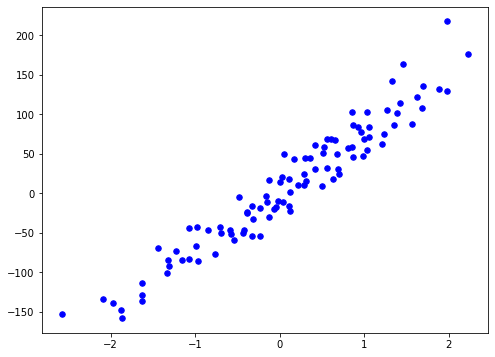

In [2]:
X,y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 24)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

fig = plt.figure(figsize = (8,6))
plt.scatter(X[:,0], y, color = "b",marker = "o", s = 30)
plt.show()

In [3]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [7]:
(np.zeros(1)).shape

(1,)

In [12]:
class LinearRegression():
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # update rules
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # ignore 2, which is just a scalar, in calculation below
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))    # use Tranpose so multiplication is valid
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw    # why exactly do we go in negative direction?
            self.bias -= self.lr * db    # I am not sure if I have the correct understanding
    
    def predict(self,X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [15]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
# use mean square error here
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

279.66107230026023


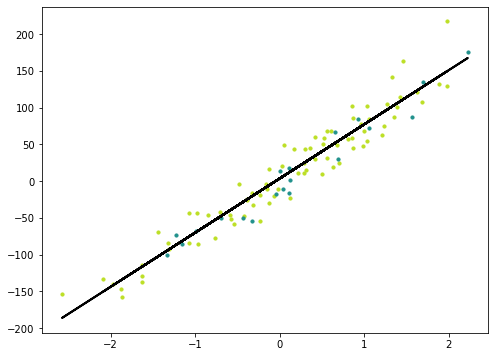

In [16]:
# visualization
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s=10)
plt.plot(X,y_pred_line, color = "black", linewidth = 2, label = "Prediction")
plt.show()